In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn import metrics


In [2]:
data = pd.read_csv('Customers.csv', delimiter = ';',decimal=',')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerId  1511 non-null   int64  
 1   Profit      1511 non-null   int64  
 2   Recency     1511 non-null   int64  
 3   Frequency   1511 non-null   int64  
 4   Monetary    1511 non-null   float64
 5   Variance    1511 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 71.0 KB


In [4]:
data.head()

,CustomerId,Profit,Recency,Frequency,Monetary,Variance
0,1,187,63,1,2349.06,2
1,2,96,10,6,922.62,4
2,3,47,35,4,881.22,3
3,4,294,5,1,3815.16,2
4,5,732,4,31,41868.11,29


In [5]:
data.describe()

,CustomerId,Profit,Recency,Frequency,Monetary,Variance
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03,1511.000000
mean,756.000000,1102.391132,15.847121,10.710126,1.753805e+05,16.673064
std,436.332442,5457.675137,19.051823,10.348786,1.791089e+06,17.704351
min,1.000000,1.000000,1.000000,1.000000,7.290000e+00,1.000000
25%,378.500000,79.000000,4.000000,3.000000,1.392950e+03,5.000000
50%,756.000000,224.000000,6.000000,9.000000,5.799930e+03,11.000000
75%,1133.500000,559.500000,19.000000,14.500000,2.228900e+04,23.000000
max,1511.000000,105993.000000,91.000000,79.000000,3.253994e+07,139.000000


array([[<AxesSubplot:title={'center':'Profit'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'Frequency'}>,
        <AxesSubplot:title={'center':'Monetary'}>],
       [<AxesSubplot:title={'center':'Variance'}>, <AxesSubplot:>]],
      dtype=object)

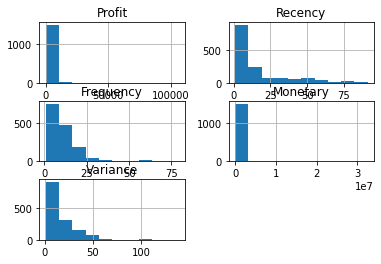

In [6]:
data.drop(['CustomerId'],axis=1).hist()

In [7]:
data.isnull().sum()

CustomerId    0
Profit        0
Recency       0
Frequency     0
Monetary      0
Variance      0
dtype: int64

array([[<AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'Profit'}>],
       [<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'Frequency'}>],
       [<AxesSubplot:title={'center':'Monetary'}>,
        <AxesSubplot:title={'center':'Variance'}>]], dtype=object)

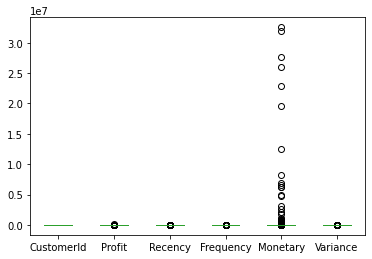

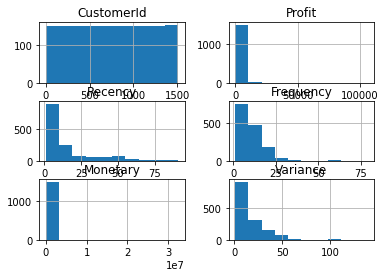

In [8]:
data.plot.box()
data.hist(bins=10)

In [9]:
train_data = data.copy()
train_data.iloc[:,1:] = PowerTransformer(method='box-cox', standardize=False).fit_transform(data.iloc[:,1:])

In [10]:
train_data.head()

,CustomerId,Profit,Recency,Frequency,Monetary,Variance
0,1,5.062790,2.859745,0.000000,7.244651,0.727911
1,2,4.435848,1.861875,2.109161,6.424930,1.530036
2,3,3.758443,2.578414,1.571584,6.384306,1.187646
3,4,5.485256,1.384987,0.000000,7.664632,0.727911
4,5,6.329694,1.217490,4.728677,9.686302,4.302447


array([[<AxesSubplot:title={'center':'Profit'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'Frequency'}>,
        <AxesSubplot:title={'center':'Monetary'}>],
       [<AxesSubplot:title={'center':'Variance'}>, <AxesSubplot:>]],
      dtype=object)

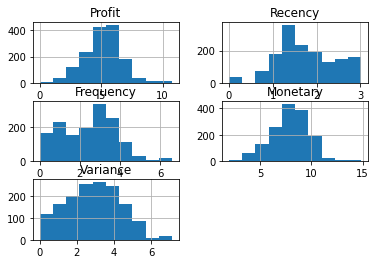

In [11]:
train_data.drop(['CustomerId'],axis=1).hist()

In [12]:
def get_KMeans(n=5):
    kmeans_model = KMeans(n_clusters=n,init='k-means++', 
                        max_iter=500, 
                        random_state=42)
    return kmeans_model

In [13]:
inertia = []

for i in range(1,10):
    kmeans_model = get_KMeans(i)
    kmeans_model.fit(train_data.iloc[:,1:])
    print("within-cluster sum-of-squares (inertia) of the model is:", kmeans_model.inertia_)
    inertia.append(kmeans_model.inertia_)

within-cluster sum-of-squares (inertia) of the model is: 15829.625637852263
within-cluster sum-of-squares (inertia) of the model is: 7434.516941727232
within-cluster sum-of-squares (inertia) of the model is: 5055.954429575887
within-cluster sum-of-squares (inertia) of the model is: 4076.8547318628157
within-cluster sum-of-squares (inertia) of the model is: 3521.4120323795837
within-cluster sum-of-squares (inertia) of the model is: 3153.7842697852802
within-cluster sum-of-squares (inertia) of the model is: 2828.857448999414
within-cluster sum-of-squares (inertia) of the model is: 2606.238733504876
within-cluster sum-of-squares (inertia) of the model is: 2391.0667232984424


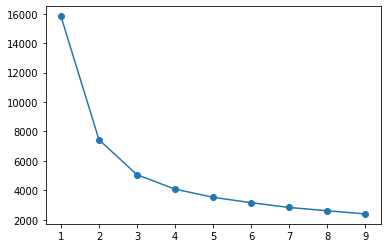

In [14]:
plt.xticks=range(1,len(inertia)+1)
plt.xmin=20
plt.plot(range(1,len(inertia)+1),inertia, '-o')

Wygląda na to, że algorytm KMeans najlepiej zadziała dla czterech segmentów

In [15]:
model = get_KMeans(n=4)
labels = model.fit_predict(train_data.iloc[:,1:])

In [16]:
labels = labels.reshape(-1,1)

In [17]:
data['SegmentId'] = labels

In [18]:
data.head()

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,SegmentId
0,1,187,63,1,2349.06,2,2
1,2,96,10,6,922.62,4,2
2,3,47,35,4,881.22,3,2
3,4,294,5,1,3815.16,2,2
4,5,732,4,31,41868.11,29,0


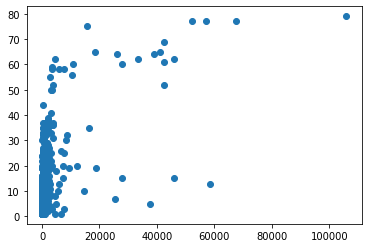

In [19]:
plt.scatter(data['Profit'],data['Frequency']) 

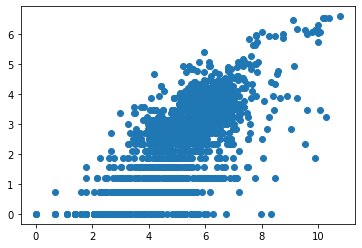

In [20]:
plt.scatter(train_data['Profit'],train_data['Frequency']) 

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,SegmentId
count,263.000000,263.000000,263.000000,263.000000,2.630000e+02,263.00000,263.0
mean,761.486692,5110.665399,6.030418,22.498099,9.680274e+05,45.61597,0.0
std,440.070786,12304.955377,7.715790,15.532747,4.210053e+06,21.66048,0.0
min,5.000000,414.000000,1.000000,1.000000,1.516078e+04,5.00000,0.0
25%,344.000000,898.500000,3.000000,13.000000,4.785710e+04,33.50000,0.0
50%,797.000000,1326.000000,4.000000,18.000000,7.570168e+04,41.00000,0.0
75%,1152.000000,2242.500000,6.000000,26.000000,1.342892e+05,50.50000,0.0
max,1509.000000,105993.000000,63.000000,79.000000,3.253994e+07,139.00000,0.0


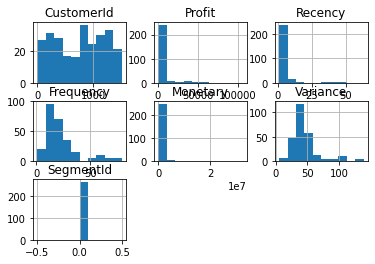

In [21]:
data[data['SegmentId']==0].hist()
data[data['SegmentId']==0].describe()


,CustomerId,Profit,Recency,Frequency,Monetary,Variance,SegmentId
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.0
mean,783.133621,26.159483,37.392241,1.728448,296.396293,1.939655,1.0
std,443.983887,41.191407,24.462827,1.146975,274.696587,1.063269,0.0
min,18.000000,1.000000,2.000000,1.000000,7.290000,1.000000,1.0
25%,405.000000,10.000000,15.500000,1.000000,100.280000,1.000000,1.0
50%,786.500000,18.000000,40.000000,1.000000,236.375000,2.000000,1.0
75%,1166.500000,30.000000,54.000000,2.000000,378.500000,3.000000,1.0
max,1500.000000,555.000000,91.000000,9.000000,1520.240000,5.000000,1.0


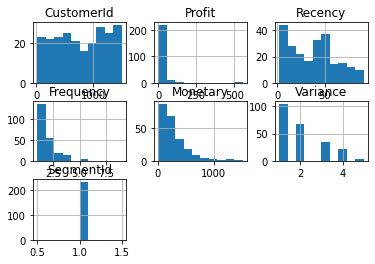

In [22]:
data[data['SegmentId']==1].hist()
data[data['SegmentId']==1].describe()


,CustomerId,Profit,Recency,Frequency,Monetary,Variance,SegmentId
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.0
mean,743.464213,146.413088,19.267894,6.042945,2988.141963,6.850716,2.0
std,434.111637,202.685629,18.938744,3.827772,2801.937224,3.170077,0.0
min,1.000000,20.000000,1.000000,1.000000,349.740000,1.000000,2.0
25%,372.000000,72.000000,5.000000,3.000000,1253.380000,5.000000,2.0
50%,740.000000,108.000000,11.000000,5.000000,2236.050000,7.000000,2.0
75%,1099.000000,168.000000,30.000000,8.000000,3808.360000,9.000000,2.0
max,1511.000000,3535.000000,90.000000,30.000000,33337.590000,19.000000,2.0


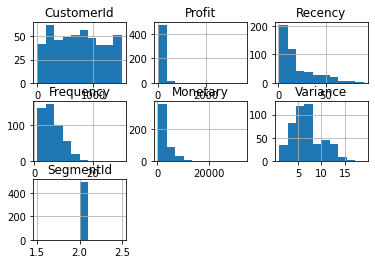

In [23]:
data[data['SegmentId']==2].hist()
data[data['SegmentId']==2].describe()


,CustomerId,Profit,Recency,Frequency,Monetary,Variance,SegmentId
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.0
mean,752.948767,462.889943,8.087287,13.111954,16847.752505,17.829222,3.0
std,433.797301,497.638338,9.624705,6.481679,14882.428573,7.118581,0.0
min,7.000000,90.000000,1.000000,1.000000,2178.730000,1.000000,3.0
25%,394.000000,246.000000,3.000000,9.000000,7129.455000,13.000000,3.0
50%,727.000000,361.000000,5.000000,12.000000,12636.800000,17.000000,3.0
75%,1106.500000,516.000000,7.000000,17.000000,21455.955000,22.000000,3.0
max,1510.000000,6615.000000,74.000000,44.000000,112525.560000,47.000000,3.0


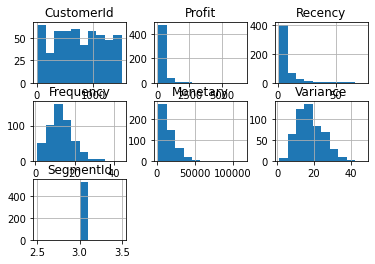

In [24]:
data[data['SegmentId']==3].hist()
data[data['SegmentId']==3].describe()


In [25]:
SegmentNames={
    0:'Bardzo aktywni, najlepsi klienci - bardzo często i dużo kupujący, bardzo dochodowi',
    1:'Nieaktywni - pojedyncze zakupy',
    2:'Odchodzący - kilka razy zamawiali, mało dochodowi',
    3:'Aktywni, często i dużo kupujący'
             }
for i, row in data.iterrows():
    data.loc[i,'SegmentName'] = SegmentNames.get(row['SegmentId'])

In [26]:
data[data['SegmentId']==0]

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,SegmentId,SegmentName
4,5,732,4,31,41868.11,29,0,"Bardzo aktywni, najlepsi klienci - bardzo częs..."
11,12,58457,11,13,25965518.20,110,0,"Bardzo aktywni, najlepsi klienci - bardzo częs..."
25,26,957,3,22,35229.52,34,0,"Bardzo aktywni, najlepsi klienci - bardzo częs..."
26,27,3858,3,52,114028.95,41,0,"Bardzo aktywni, najlepsi klienci - bardzo częs..."
38,39,597,3,27,29915.37,26,0,"Bardzo aktywni, najlepsi klienci - bardzo częs..."
...,...,...,...,...,...,...,...,...
1466,1467,1887,3,17,84963.79,37,0,"Bardzo aktywni, najlepsi klienci - bardzo częs..."
1479,1480,38877,2,64,4794635.85,102,0,"Bardzo aktywni, najlepsi klienci - bardzo częs..."
1485,1486,8247,5,30,164107.06,35,0,"Bardzo aktywni, najlepsi klienci - bardzo częs..."
1490,1491,18662,5,19,352667.37,27,0,"Bardzo aktywni, najlepsi klienci - bardzo częs..."


In [27]:
data.to_csv('customers1.csv',sep=';',decimal=',')

array([[<AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'Profit'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'Frequency'}>,
        <AxesSubplot:title={'center':'Monetary'}>,
        <AxesSubplot:title={'center':'Variance'}>],
       [<AxesSubplot:title={'center':'SegmentId'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

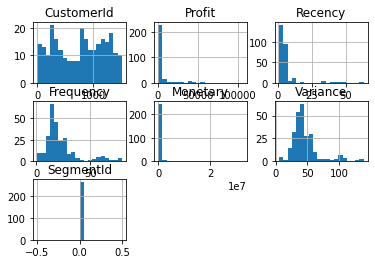

In [28]:
data[data['SegmentId']==0].hist(bins=20)

In [29]:
data[(data['SegmentId']==0) & (data['Profit']>10000)].describe()

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,SegmentId
count,26.000000,26.000000,26.000000,26.000000,2.600000e+01,26.000000,26.0
mean,841.384615,36010.538462,4.730769,48.615385,8.681128e+06,90.307692,0.0
std,505.249806,21497.828159,6.696612,25.949300,1.074887e+07,35.451115,0.0
min,12.000000,10457.000000,1.000000,5.000000,1.425471e+05,7.000000,0.0
25%,402.500000,18586.250000,2.000000,19.250000,7.834626e+05,77.250000,0.0
50%,910.500000,35482.500000,2.500000,60.500000,3.926955e+06,100.500000,0.0
75%,1267.500000,45012.250000,4.000000,65.000000,1.138243e+07,106.750000,0.0
max,1491.000000,105993.000000,34.000000,79.000000,3.253994e+07,139.000000,0.0


# Podzielenie na 5 segmentów pozwoliło dodatkowo wyodrębnić grupę kilkudziesięciu 'elitarnych klientów', którzy wcześniej zawierali się w segmencie 0, ale bardzo odstawali od reszty

In [30]:
model = get_KMeans(n=5)
labels = model.fit_predict(train_data.iloc[:,1:])

In [31]:
labels = labels.reshape(-1,1)

In [32]:
data['SegmentId'] = labels

In [33]:
data.head()

,CustomerId,Profit,Recency,Frequency,Monetary,Variance,SegmentId,SegmentName
0,1,187,63,1,2349.06,2,0,"Odchodzący - kilka razy zamawiali, mało dochodowi"
1,2,96,10,6,922.62,4,0,"Odchodzący - kilka razy zamawiali, mało dochodowi"
2,3,47,35,4,881.22,3,0,"Odchodzący - kilka razy zamawiali, mało dochodowi"
3,4,294,5,1,3815.16,2,0,"Odchodzący - kilka razy zamawiali, mało dochodowi"
4,5,732,4,31,41868.11,29,4,"Bardzo aktywni, najlepsi klienci - bardzo częs..."


,CustomerId,Profit,Recency,Frequency,Monetary,Variance,SegmentId
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.0
mean,738.477679,135.075893,20.089286,5.754464,2681.834397,6.457589,0.0
std,436.502245,134.906558,19.429816,3.712543,2190.302151,2.949688,0.0
min,1.000000,20.000000,1.000000,1.000000,349.740000,1.000000,0.0
25%,350.500000,69.000000,5.000000,3.000000,1208.787500,4.000000,0.0
50%,737.000000,100.000000,12.000000,5.000000,1974.695000,6.000000,0.0
75%,1097.500000,158.500000,33.000000,8.000000,3415.215000,8.000000,0.0
max,1511.000000,1910.000000,90.000000,30.000000,18115.200000,16.000000,0.0


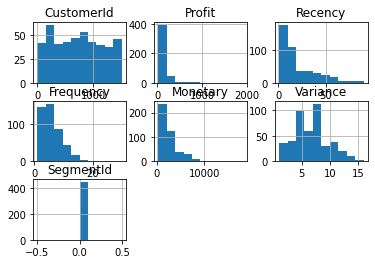

In [34]:
data[data['SegmentId']==0].hist()
data[data['SegmentId']==0].describe()


,CustomerId,Profit,Recency,Frequency,Monetary,Variance,SegmentId
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.0
mean,762.053830,394.722567,8.679089,12.285714,13015.111325,15.695652,1.0
std,432.855458,488.053001,10.332166,6.170565,11301.789494,5.987931,0.0
min,7.000000,89.000000,1.000000,1.000000,2178.730000,1.000000,1.0
25%,419.500000,216.500000,4.000000,8.000000,5736.105000,12.000000,1.0
50%,746.000000,302.000000,5.000000,12.000000,9835.830000,15.000000,1.0
75%,1120.000000,420.500000,10.000000,15.000000,16648.215000,20.000000,1.0
max,1510.000000,6615.000000,77.000000,37.000000,112525.560000,37.000000,1.0


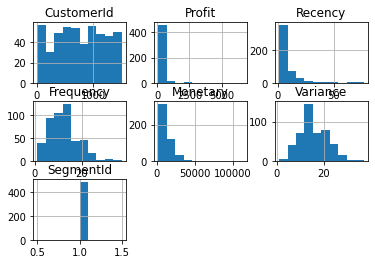

In [35]:
data[data['SegmentId']==1].hist()
data[data['SegmentId']==1].describe()


,CustomerId,Profit,Recency,Frequency,Monetary,Variance,SegmentId
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.0
mean,783.716157,25.489083,37.436681,1.716157,287.493624,1.938865,2.0
std,444.877218,40.483006,24.280916,1.140464,261.561168,1.066113,0.0
min,18.000000,1.000000,2.000000,1.000000,7.290000,1.000000,2.0
25%,406.000000,10.000000,16.000000,1.000000,99.980000,1.000000,2.0
50%,786.000000,18.000000,40.000000,1.000000,226.440000,2.000000,2.0
75%,1180.000000,30.000000,54.000000,2.000000,370.220000,3.000000,2.0
max,1500.000000,555.000000,91.000000,9.000000,1520.240000,5.000000,2.0


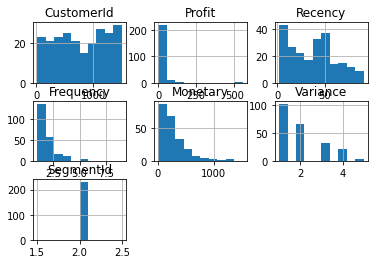

In [36]:
data[data['SegmentId']==2].hist()
data[data['SegmentId']==2].describe()


,CustomerId,Profit,Recency,Frequency,Monetary,Variance,SegmentId
count,28.000000,28.000000,28.000000,28.000000,2.800000e+01,28.000000,28.0
mean,851.892857,32604.821429,3.464286,50.357143,8.094665e+06,93.964286,3.0
std,482.723166,23210.572926,2.912071,23.589411,1.056511e+07,26.958792,0.0
min,12.000000,6051.000000,1.000000,5.000000,1.619009e+05,26.000000,3.0
25%,407.500000,11839.000000,2.000000,25.750000,6.574496e+05,79.250000,3.0
50%,1005.000000,30529.500000,3.000000,60.000000,2.815823e+06,100.000000,3.0
75%,1254.500000,43392.750000,3.250000,65.000000,9.224349e+06,106.250000,3.0
max,1480.000000,105993.000000,12.000000,79.000000,3.253994e+07,139.000000,3.0


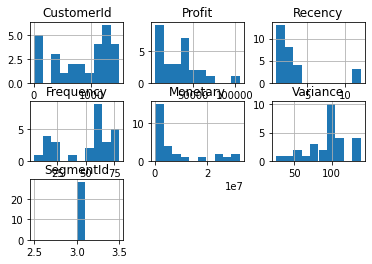

In [37]:
data[data['SegmentId']==3].hist()
data[data['SegmentId']==3].describe()


,CustomerId,Profit,Recency,Frequency,Monetary,Variance,SegmentId
count,323.000000,323.000000,323.000000,323.000000,3.230000e+02,323.000000,323.0
mean,743.287926,1534.910217,6.448916,18.167183,9.534279e+04,36.049536,4.0
std,431.476903,2182.494486,8.035617,9.519997,3.481468e+05,12.053093,0.0
min,5.000000,371.000000,1.000000,1.000000,1.215708e+04,5.000000,4.0
25%,342.500000,698.000000,3.000000,13.000000,3.176703e+04,27.500000,4.0
50%,769.000000,980.000000,5.000000,16.000000,5.285917e+04,35.000000,4.0
75%,1116.500000,1506.500000,6.000000,22.000000,9.276288e+04,44.000000,4.0
max,1509.000000,25428.000000,63.000000,62.000000,6.166031e+06,69.000000,4.0


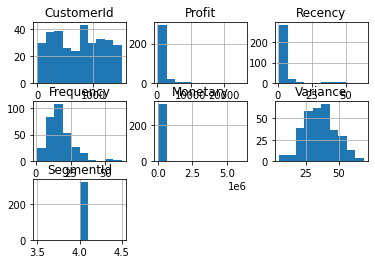

In [38]:
data[data['SegmentId']==4].hist()
data[data['SegmentId']==4].describe()

In [39]:
SegmentNames={0:'Odchodzący - kilka razy zamawiali, mało dochodowi',
              1:'Zwykli aktywni klienci',
              2:'Nieaktywni - pojedyncze zakupy',
              3:'Elitarni klienci/vip - najwięcej kupująca i najbardziej dochodowa grupa',
              4:'Aktywni -  często i dużo kupujący, bardziej dochodowi'
             }
for i, row in data.iterrows():
    data.loc[i,'SegmentName'] = SegmentNames.get(row['SegmentId'])

In [40]:
data.to_csv('Customers.csv',sep=';',decimal=',')